In [1]:
import warnings
warnings.filterwarnings("ignore")
from ensemble_functions import *
import numpy as np
import argparse
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [4]:
#Input cell

#Timestep ant number of timesteps
dt = 1
nt = 36000
#L discretisation
dl = 0.1 
Lmin = 2.5
Lmax = 6

L = np.arange(Lmin,Lmax,dl)
    
#Initial PSD, arguments are in my paper (trying to find a link to the functional form with)
#a better description of the inputs!
f = PSD(L,A=9*10**4, B=0.05, mu=4, sig=0.38, gamma=5)

#Kp value for Ozeke DLL
kp = 5

#What timestep to return PSD values
f_return = 3600 #hourly

In [5]:
#Boundary condition inputs
#If you want just default (values of f at each endpoint)
#lbc = None
#rbc = None

#Or if you want the a particular custom value at each timestep
lbc = [0]*nt
rbc = [0]*nt

#Or if you want custom values at each time step
#lbc = list(np.sin(something))
#rbc = list(np.sin(something))

#Type of BC
ltype = 'd'
rtype = 'n'

In [6]:
#Ozeke 2014 DLL in SECONDS, for timesteps one more than you need
D = [Diff_Coeff(L,kp,full=False)/86400]*int(nt+1)

#Source term (for simple experiments I haven't used, but we might want to in the project!)
Q = [np.zeros(len(L))] *int(nt+1)

#Run diffusion model
final_psd, psd_array = Crank_Nicolson(dt,nt,dl,L,f,D,Q,lbc=lbc,rbc=rbc,ltype=ltype,rtype=rtype,f_return=f_return)

TypeError: Dimensions of C (11, 35) are incompatible with X (35) and/or Y (10); see help(pcolormesh)

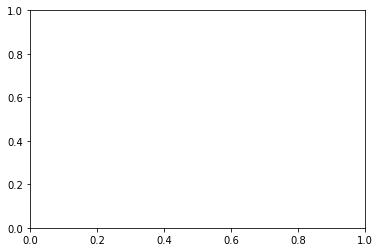

In [13]:
#Heatmap example
X,Y = np.meshgrid(L,np.arange(0,nt,f_return))
plt.pcolormesh(Y,X,np.array(psd_array),cmap='pink_r')

In [15]:
len(psd_array)

11